# ViperGPT -- Quick Start

This notebook is meant to be a quick entry into ViperGPT. **Warning:** This notebook will execute arbitrary code on your machine. Proceed at your own risk.

Before running this code, modify any parameters at `configs/my_config.yaml`. For example, you may want to change the BLIP model (`blip_v2_model_type`) from XXL to XL if your GPU does not have enough memory.

In [1]:
from main_simple_lib import *

Loading BLIP...

2023-03-21 03:29:18.860169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 03:29:19.319676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-21 03:29:19.319716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-21 03:29:19.319719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

BLIP loaded

Loading DepthEstimation...

DepthEstimation loaded

Loading OwlViT...

OwlViT loaded

Loading XVLM...

XVLM loaded

In [2]:
def display_example(image_id,question,answer):
    #question_id = list(question_id_to_image_id.keys())[idx]
    #print('Image Id: ', image_id)
    print('Question:',question)
    print('Correct Answer:', answer)
    img = Image.open(f'/home/michal5/data/gqa/images/{image_id}.jpg')
    plt.imshow(img)

Question: Does the shirt have black color?

Correct Answer: yes

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     shirt_patches = image_patch.find("shirt")                                                                  
  3     # Question assumes only one shirt patch                                                                    
  4     return bool_to_yesno(shirt_patches[0].verify_property("shirt", "black"))                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:11                                                                                   │
│                                                                                                  │
│    8 │   shirt_patches = image_patch.find("shirt")                                               │
│    9 │    # Question assumes only one shirt patch                                                │
│   10 │   return bool_to_yesno(shirt_patches[0].verify_property("shirt", "black"))                │
│ ❱ 11 execute_command(im)                                                                         │
│   12 #Does not work since did not find any shirt patches                                         │
│   13                                                                                             │
│                                                                                                  │
│ in execute_command:10                                                                            │
│                                                                                                  │
│    7 │   image_patch = ImagePatch(image)                                                         │
│    8 │   shirt_patches = image_patch.find("shirt")                                               │
│    9 │    # Question assumes only one shirt patch                                                │
│ ❱ 10 │   return bool_to_yesno(shirt_patches[0].verify_property("shirt", "black"))                │
│   11 execute_command(im)                                                                         │
│   12 #Does not work since did not find any shirt patches                                         │
│   13                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: list index out of range

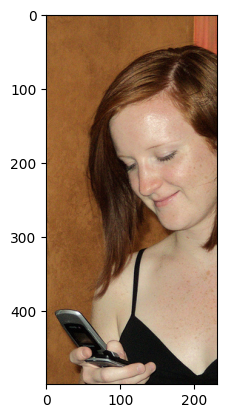

In [4]:
#GQA 1
im = load_image('/home/michal5/data/gqa/images/2325450.jpg')
query = "Does the shirt have black color?"
display_example('2325450',query,'yes')
code = get_code(query)
def execute_command(image):                                                                         
    image_patch = ImagePatch(image)                                                                            
    shirt_patches = image_patch.find("shirt")                                                                  
     # Question assumes only one shirt patch                                                                    
    return bool_to_yesno(shirt_patches[0].verify_property("shirt", "black"))
execute_command(im)
#Does not work since did not find any shirt patches 

Question: Are there any squirrels near the can?

Correct Answer: no

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     can_patches = image_patch.find("can")                                                                      
  3     can_patch = can_patches[0]                                                                                 
  4     squirrel_patches = image_patch.find("squirrel")                                                            
  5     for squirrel_patch in squirrel_patches:                                                                    
  6         if distance(squirrel_patch, can_patch) < 100:                                                          
  7             return True                                                                                        
  8     return False                                                                                               

False

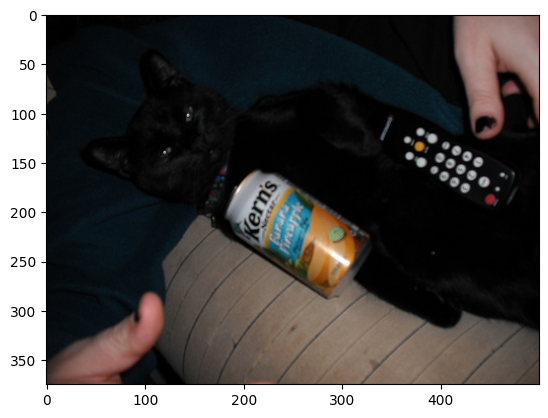

In [5]:
 #GQA 2
im = load_image('/home/michal5/data/gqa/images/2353927.jpg')
query = 'Are there any squirrels near the can?'
display_example('2353927',query,'no')
code = get_code(query)
def execute_command(image):                                                                                    
    image_patch = ImagePatch(image)                                                                            
    can_patches = image_patch.find("can")                                                                      
    can_patch = can_patches[0]                                                                                 
    squirrel_patches = image_patch.find("squirrel")                                                            
    for squirrel_patch in squirrel_patches:                                                                    
        if distance(squirrel_patch, can_patch) < 100:                                                          
            return True                                                                                        
    return False  
execute_command(im)
#In examples given in the paper, if no squirrel patches were not found, then the whole image was queried 

Question: Is the fence silver?

Correct Answer: no

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     fence_patches = image_patch.find("fence")                                                                  
  3     return bool_to_yesno(fence_patches[0].verify_property("fence", "silver"))                                  

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:13                                                                                   │
│                                                                                                  │
│   10    return bool_to_yesno(fence_patches[0].verify_property("fence", "silver"))                │
│   11                                                                                             │
│   12                                                                                             │
│ ❱ 13 execute_command(im)                                                                         │
│   14 #threshold problem likely; does not take into account what happens when finding no patch    │
│   15                                                                                             │
│                                                                                                  │
│ in execute_command:10                                                                            │
│                                                                                                  │
│    7 def execute_command(image):                                                                 │
│    8    image_patch = ImagePatch(image)                                                          │
│    9    fence_patches = image_patch.find("fence")                                                │
│ ❱ 10    return bool_to_yesno(fence_patches[0].verify_property("fence", "silver"))                │
│   11                                                                                             │
│   12                                                                                             │
│   13 execute_command(im)                                                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: list index out of range

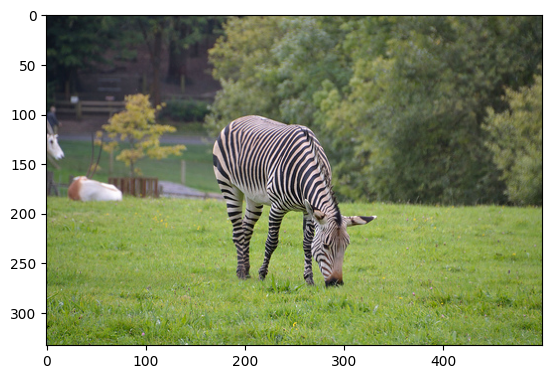

In [6]:
 #GQA 3
im = load_image('/home/michal5/data/gqa/images/2401706.jpg')
query = 'Is the fence silver?'
display_example('2401706',query,'no')

code = get_code(query)
def execute_command(image):                                                                                    
    image_patch = ImagePatch(image)                                                                            
    fence_patches = image_patch.find("fence")                                                                  
    return bool_to_yesno(fence_patches[0].verify_property("fence", "silver")) 


execute_command(im)
#threshold problem likely; does not take into account what happens when finding no patches 

Question: Are there any sheep that are not white?

Correct Answer: yes

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     sheep_patches = image_patch.find("sheep")                                                                  
  3     for sheep_patch in sheep_patches:                                                                          
  4         if not sheep_patch.verify_property("sheep", "white"):                                                  
  5             return True                                                                                        
  6     return False                                                                                               

True

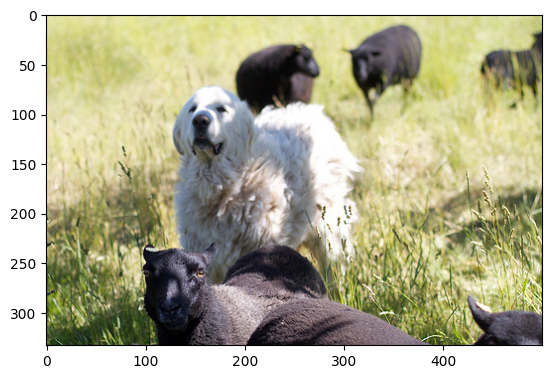

In [7]:
 #GQA 4
im = load_image('/home/michal5/data/gqa/images/2398544.jpg')
query = 'Are there any sheep that are not white?'
display_example('2398544',query,'yes')

code = get_code(query)
def execute_command(image):                                                                                    
    image_patch = ImagePatch(image)                                                                            
    sheep_patches = image_patch.find("sheep")                                                                  
    for sheep_patch in sheep_patches:                                                                          
        if not sheep_patch.verify_property("sheep", "white"):                                                  
            return True                                                                                        
    return False 

execute_command(im)


Question: Are there any cars?

Correct Answer: no

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     return image_patch.exists("car")                                                                           

False

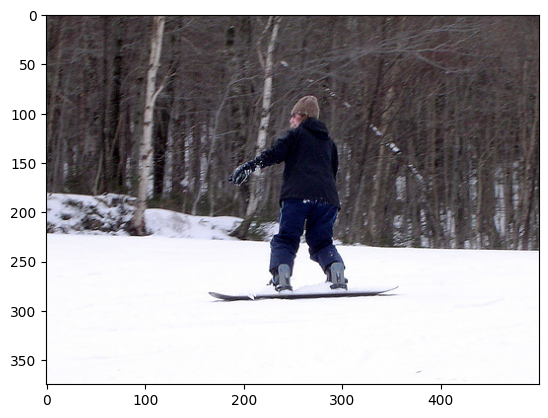

In [9]:
 #GQA 5
im = load_image('/home/michal5/data/gqa/images/2352698.jpg')
query = 'Are there any cars?'
display_example('2352698',query,'no')

code = get_code(query)
def execute_command(image):                                                                                    
    image_patch = ImagePatch(image)                                                                            
    return image_patch.exists("car") 

execute_command(im)


Question: Are there any large plates?

Correct Answer: yes

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     plate_patches = image_patch.find("plate")                                                                  
  3     for plate_patch in plate_patches:                                                                          
  4         if plate_patch.verify_property("plate", "large"):                                                      
  5             return True                                                                                        
  6     return False                                                                                               

False

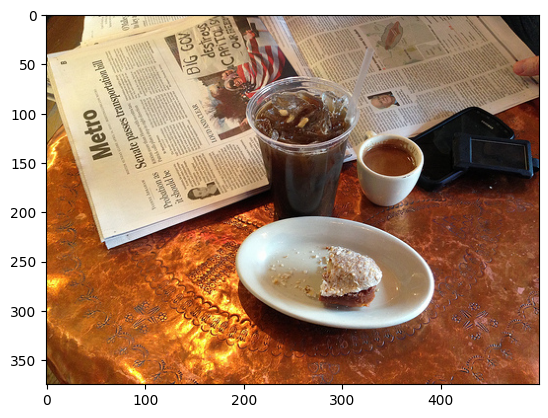

In [14]:
 #GQA 6
from image_patch import ImagePatch
im = load_image('/home/michal5/data/gqa/images/2396702.jpg')
query = 'Are there any large plates?'
display_example('2396702',query,'yes')

code = get_code(query)
def execute_command(image):                                                                                    
    image_patch = ImagePatch(image)                                                                            
    plate_patches = image_patch.find("plate")                                                                  
    for plate_patch in plate_patches:                                                                          
        if plate_patch.verify_property("plate", "large"):                                                      
            return True                                                                                        
    return False 


execute_command(im)
#in this case we do not actually want to look for a plate that is large but rather a large plate as a whole 

Question: Are there any large plates?

Correct Answer: yes

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     plate_patches = image_patch.find("plate")                                                                  
  3     for plate_patch in plate_patches:                                                                          
  4         if plate_patch.verify_property("plate", "large"):                                                      
  5             return True                                                                                        
  6     return False                                                                                               

'no'

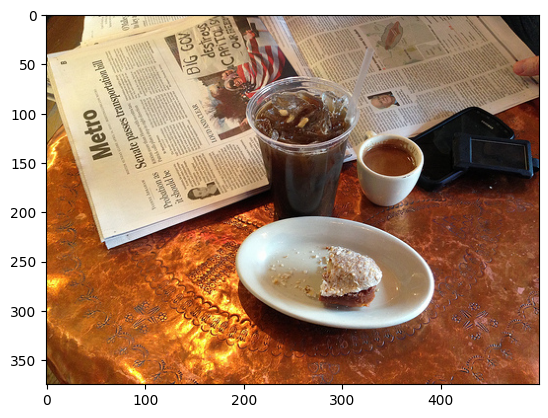

In [15]:
#alternative 
from image_patch import ImagePatch
im = load_image('/home/michal5/data/gqa/images/2396702.jpg')
query = 'Are there any large plates?'
display_example('2396702',query,'yes')

code = get_code(query)
                                                                
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    return bool_to_yesno(image_patch.exists("large plate"))
execute_command(im)

Question: Is the desktop computer to the right of the book?

Correct Answer: yes

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     desktop_computer_patches = image_patch.find("desktop computer")                                            
  3     book_patches = image_patch.find("book")                                                                    
  4     for desktop_computer_patch in desktop_computer_patches:                                                    
  5         for book_patch in book_patches:                                                                        
  6             if desktop_computer_patch.horizontal_center > book_patch.horizontal_center:                        
  7                 return "yes"                                                                                   
  8     return "no"                                                                                                

0 0 length

'no'

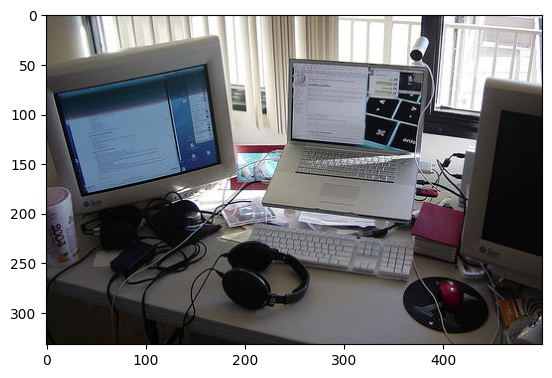

In [3]:
 #GQA 7
from image_patch import ImagePatch
im = load_image('/home/michal5/data/gqa/images/2405561.jpg')
query = 'Is the desktop computer to the right of the book?'
display_example('2405561',query,'yes')

code = get_code(query)
def execute_command(image):                                                                                    
    image_patch = ImagePatch(image)                                                                            
    desktop_computer_patches = image_patch.find("desktop computer")                                            
    book_patches = image_patch.find("book")    
    print(len(desktop_computer_patches),len(book_patches),'length')                                                                
    for desktop_computer_patch in desktop_computer_patches:                                                    
        for book_patch in book_patches:                                                                        
            if desktop_computer_patch.horizontal_center > book_patch.horizontal_center:                        
                return "yes"                                                                                   
    return "no" 


execute_command(im)
#in this case we do not actually want to look for a plate that is large but rather a large plate as a whole 